#CNN

![](https://developer.nvidia.com/sites/default/files/pictures/2018/convolutional_neural_network.png)


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
torch.cuda.is_available()

True

### 🚦torchvision.transforms


image transformation

using Compose can combine transformations

    torchvision.transforms.Compose([list of transformations ])
transforms accept PIL images and arrays with dtype = 'uint8' 




In [4]:
tra = transforms.Compose([transforms.RandomAutocontrast(5),
                          transforms.RandomVerticalFlip()])

In [5]:
# opening image as PIL image
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
x = Image.open('/content/por.jpg')

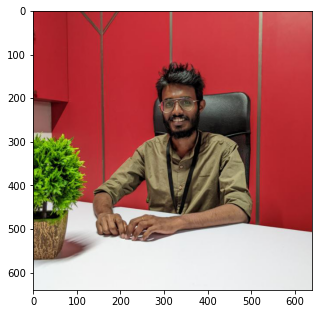

In [7]:
plt.figure(figsize=(5,7))
plt.imshow(x)

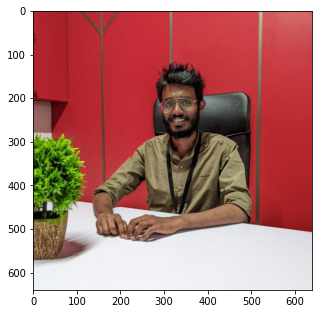

In [8]:
img = tra(x)
plt.figure(figsize=(5,7))
plt.imshow(img)

here the transformations are applied

#### creating multiple transformations combining it by Compose

when PIL image is converted into ToTensor() shape changes to (C,H,W)



In [9]:
import numpy as np
import matplotlib.pyplot as plt

(2, 6, 3)


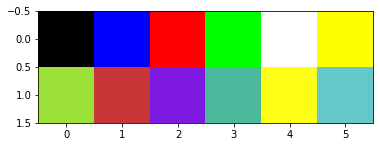

In [10]:
arr = np.array([[[0,0,0],[0,0,255],[255,0,0],[0,255,0],[255,255,255],[255,255,0]],
                [[155,225,55],[200,55,55],[125,25,225],[75,185,155],[255,255,20],[100,200,200]]])
print(arr.shape)
plt.imshow(arr)


#imshow array as pixels

In [11]:
#for coverting array into image
import PIL

In [12]:
# data type of array should be unsigned int 8

arr = np.array(arr,dtype='uint8')

In [13]:
arr_img = PIL.Image.fromarray(arr)
arr_img

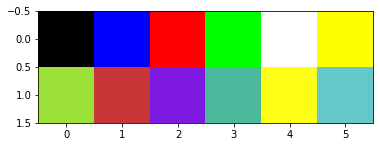

In [14]:
plt.imshow(arr_img)

In [15]:
print(arr)

[[[  0   0   0]
  [  0   0 255]
  [255   0   0]
  [  0 255   0]
  [255 255 255]
  [255 255   0]]

 [[155 225  55]
  [200  55  55]
  [125  25 225]
  [ 75 185 155]
  [255 255  20]
  [100 200 200]]]


In [16]:
all_transforms = transforms.Compose([transforms.ToTensor()])

In [17]:
#applying transformation
ten_img = all_transforms(arr_img)
print(ten_img.shape)
print(type(ten_img))
print(ten_img)

#shape changed to (C,h,w)

torch.Size([3, 2, 6])
<class 'torch.Tensor'>
tensor([[[0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 1.0000],
         [0.6078, 0.7843, 0.4902, 0.2941, 1.0000, 0.3922]],

        [[0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000],
         [0.8824, 0.2157, 0.0980, 0.7255, 1.0000, 0.7843]],

        [[0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000],
         [0.2157, 0.2157, 0.8824, 0.6078, 0.0784, 0.7843]]])


In [18]:
#not same as reshaping 
print(arr.reshape(3,2,6))

[[[  0   0   0   0   0 255]
  [255   0   0   0 255   0]]

 [[255 255 255 255 255   0]
  [155 225  55 200  55  55]]

 [[125  25 225  75 185 155]
  [255 255  20 100 200 200]]]


#### transforms.Normalize()

  Normalize() is making the mean 0 and std 1

          input[channel] - mean[channel] ) / std[Channel] 

 (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels,

In [19]:
#finding the mean of each channel
m1 = ten_img.mean(dim=2) # mean of rows in each channel
m1

tensor([[0.5000, 0.5948],
        [0.5000, 0.6176],
        [0.3333, 0.4641]])

In [20]:
m1.mean(dim=1) #mean of each color channel

tensor([0.5474, 0.5588, 0.3987])

In [21]:
m11 = ten_img.mean([1,2])#both step at a time
m11

tensor([0.5474, 0.5588, 0.3987])

In [22]:
std = ten_img.std([1,2])#std of each color channel
std

tensor([0.4123, 0.4501, 0.4216])

In [23]:
std1 = ten_img.std(dim=2)

std1.mean(dim=1)

tensor([0.4048, 0.4592, 0.4271])

In [24]:
all_transforms = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize(m11,std)])

In [25]:
norm_img  = all_transforms(arr_img)
norm_img

tensor([[[-1.3277, -1.3277,  1.0979, -1.3277,  1.0979,  1.0979],
         [ 0.1466,  0.5747, -0.1387, -0.6143,  1.0979, -0.3765]],

        [[-1.2415, -1.2415, -1.2415,  0.9801,  0.9801,  0.9801],
         [ 0.7188, -0.7623, -1.0237,  0.3703,  0.9801,  0.5009]],

        [[-0.9457,  1.4264, -0.9457, -0.9457,  1.4264, -0.9457],
         [-0.4341, -0.4341,  1.1473,  0.4961, -0.7597,  0.9147]]])

In [26]:
#cheking the mean and std of normalized 
print(norm_img.mean([1,2])) #mean is close to 0
norm_img.std([1,2]) #std is close to 1

tensor([-4.9671e-09,  2.4835e-08, -7.4506e-08])


tensor([1., 1., 1.])

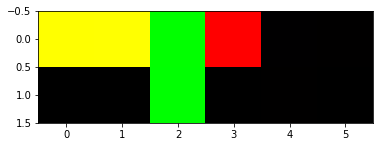

In [27]:
#show the image
norm_img.shape  #to convert(3,2,6) to PIL(2,6,3) need to change the shape
np_img = np.array(norm_img,dtype='uint8')
# transpose from shape of (3,,) to shape of (,,3)
norm_pil = np_img.transpose(1,2,0)
norm_pil.shape

pil_img = PIL.Image.fromarray(norm_pil)
plt.imshow(pil_img) 


after normalize the image mean and standard deviation becomes 0 and 1 respectively.



Text(0.5, 1.0, 'distribution of pixels')

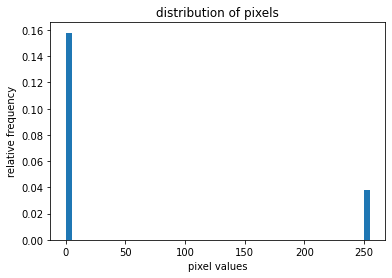

In [28]:
plt.hist(norm_pil.ravel(),bins=50,density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [29]:
#do all this to 1 image

#### transforms

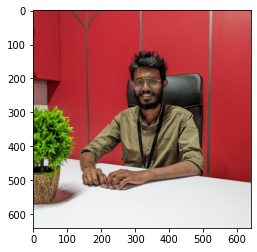

In [30]:
pil_img = PIL.Image.open('/content/por.jpg')
plt.imshow(pil_img)

In [31]:

my_transforms = transforms.Compose([transforms.ToTensor()])

In [32]:
trans_img = my_transforms(pil_img)

In [33]:
mean = trans_img.mean([1,2])
std = trans_img.std([1,2])

In [34]:
norm_trans = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize(mean,std)])

In [35]:
norm_img = norm_trans(pil_img)
norm_img.std([1,2])

tensor([1.0000, 1.0000, 1.0000])

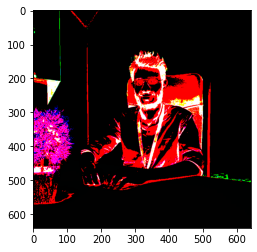

In [36]:
#show the normalized image

np_n_img = np.array(norm_img,np.uint8)
np_img = np_n_img.transpose(1,2,0)
pil_n_img = PIL.Image.fromarray(np_img)

plt.imshow(pil_n_img)

Normalization helps get data within a range and reduces the skewness which helps learn faster and better. Normalization can also tackle the diminishing and exploding gradients problems.



### LOADING DATASET

start by loading some data. We will be using the CIFAR-10 dataset. 

The dataset has 60,000 color images (RGB) at 32px x 32px belonging to 10 different classes (6000 images/class).

 The dataset is divided into 50,000 training and 10,000 testing images.

In [37]:
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                    ])

**TO NORMALIZE THE DATA WE ARE USING THE MEAN AND STD OF  *ImageNet*  DATASET** 

assuming we are working with images like imagenet images (Natural Scenes)

if we are working with images that are different from ImageNet data (ie medical images, satellite imagery, hand drawings) we have to find mean and std of our dataset

#### torchvision

torchvision package have all the 
  1. models and pretrained weights,
  2. datasets  
  3. parent classes for making dataset
  4. image transformations

all datasets are sub class of torch.util.data.Datasets 

You can also create your own datasets using the provided base classes.

In [38]:
#downloading training data from torchvision dataset and applying transform
train_data = torchvision.datasets.CIFAR10(root='./data',
                                          transform=all_transforms,
                                          train=True,
                                          download=True)
#transform is transformations for independent data
#target_transform for target data

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [39]:

test_data = torchvision.datasets.CIFAR10(root='./data',
                                         train=False,
                                         transform=all_transforms,
                                         download=True)

Files already downloaded and verified


In [40]:
#class we  need to predict
test_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [41]:
#test_data.data[0]
#if we access data like this it will be data before applying transform 

In [42]:
img , label = test_data[0]
print(img.shape)
print(type(img))
print(img.dtype)

torch.Size([3, 32, 32])
<class 'torch.Tensor'>
torch.float32


**the transformations are applied**
1. 32 x 32 sized image data with 3 color channels in order of (C,H,W)
2. each image is now torch.Tensor 
3. type of element in Tensor is float32



#### showing the data using PIL lib

In [43]:
from PIL import Image
import matplotlib.pyplot as plt

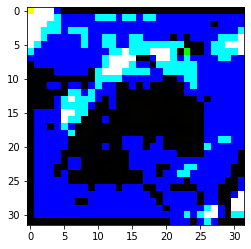

In [44]:
#function to covert numpy array to PIL image
x,q =train_data[0]
x = x.permute(1,2,0)
x=np.array(x,dtype='uint8')
z=Image.fromarray(x)
plt.imshow(z)

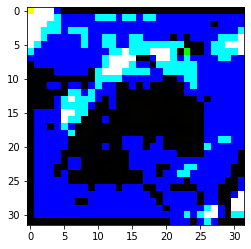

In [45]:
# we show numpy arrays as images using pyplot
plt.imshow(x)

#### showing the image using openCV lib

In [46]:
import cv2 as cv
#cv.imshow(x)

In [47]:
# since cv.imshow not works in colab we use this patch function
from google.colab.patches import cv2_imshow

In [48]:
a = cv.cvtColor(x,cv.COLOR_RGB2BGR)
#open cv reads color channel as (BGR)

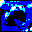

In [49]:
cv2_imshow(a)

In [50]:
??cv2_imshow

#### showing data using pyplot

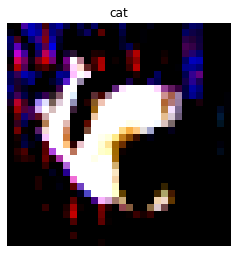

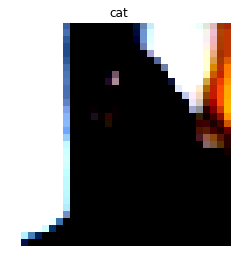

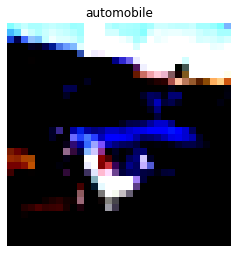

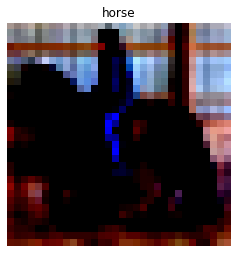

In [51]:

for i in range(4):
  x = torch.randint(size=(1,),low = 0,high = len(train_data)).item()
  img, label = train_data[x]
  img = img.permute(1,2,0)
  plt.figure(figsize=(4,7))
  plt.axis('off')
  plt.imshow(img)
  plt.title(train_data.classes[label])

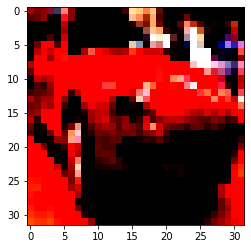

In [52]:
img, label = train_data[5]
#img is in (C,H,W) ie (0,1,2)
img = img.permute(1,2,0) #this is change the dimentions
#converted to (H,W,C) ie (1,2,0)
plt.imshow(img)

**the images looks like this because we Normalized them**

### DATALOADERS

  loading the data all at once to GPU-RAM will run out of mem and
  
  we don't want to load 1 data at time

  so we create an iterable ie the dataloader we can specify the size of inputs given to RAM at once ie batch_size

  shuffle = True will include images from different classes

In [53]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size=64,
                                           shuffle=True)

In [54]:
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=64,
                                          shuffle=True)

***In each iteration it returns a batch of images and lables***

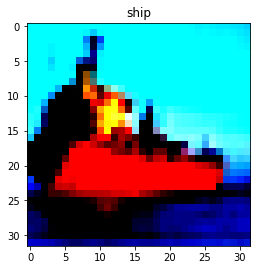

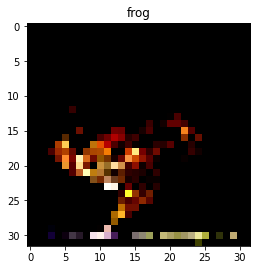

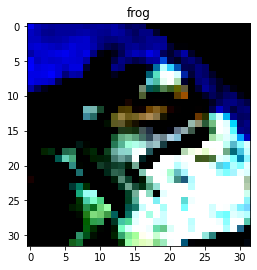

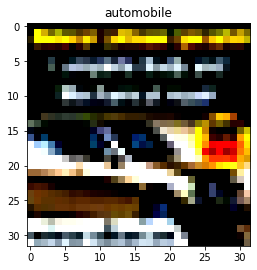

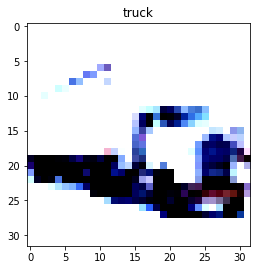

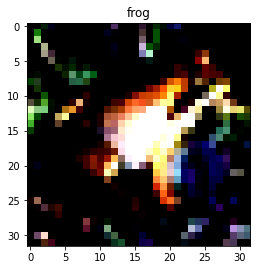

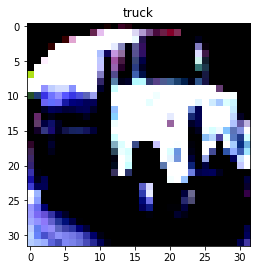

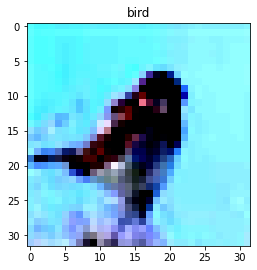

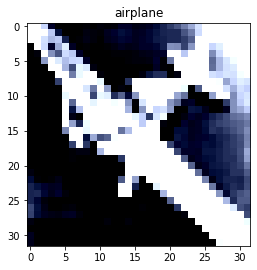

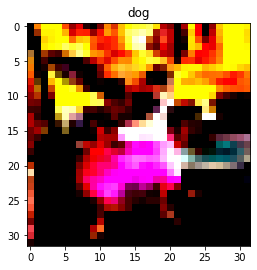

In [55]:
# testing the loader
t_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=1000,
                                          shuffle=True)
for batch_images,batch_label in t_loader:
  img = batch_images[0]
  
  plt.figure(figsize=(4,7))
  img = img.permute(1,2,0)
  plt.imshow(img)
  plt.title(train_data.classes[batch_label[0]])

The Dataset only load one image and one label at a time

while training we need to load data as minibatches so that we can
use of the Python's multiprocessing

we need to shuffle the data each epoch to reduce over fitting 

to do all these we create an iterable ie DataLoader

### Model

In [56]:
import torch.nn

In [57]:
class ConvNet(torch.nn.Module):
  def __init__(self,num_class):
    super(ConvNet,self).__intit__()
    self.conv1 = torch.nn.Conv2d(in_channels = 3 ,out_channesl=32,kernel_size = 3)
    self.conv2 = torch.nn.Conv2d(in_channels = 32,out_channels=32,kernel_size = 3)
    self.max_pool1 = torch.nn.MaxPool2d(kernal_size = 2,stride=2)

Extends nn.Module bcz it has methods and variables for training nn

nn.Conv2d(3,32,3) --apply 2d convolutions to each channel in input return output  with 32 channels 

the values in kernel are the weights of convutional layer

the each value in kernel will have requires_grad=True 

these are intilized randomly

##### Conv2d 

[documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)



**dialation in kernal**


![dialation in kernal](https://www.researchgate.net/profile/Mohammad-Hamed-Mozaffari/publication/335390357/figure/fig2/AS:795761700794376@1566735782667/A-scenario-of-dilated-convolution-for-kernel-size-33-From-the-top-a-it-is-the.jpg)

Text(0.5, 1.0, 'input image')

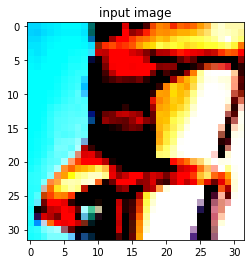

In [58]:
p,_ = train_data[43]
j = p.permute(2,1,0)
plt.imshow(j)
plt.title("input image")

In [59]:
conv = torch.nn.Conv2d(in_channels=3,out_channels=3,kernel_size=3)
x= conv(p)

# outputs a 3 channel there for we can illustrate the feature learned

In [60]:
conv.weight.shape

torch.Size([3, 3, 3, 3])

Text(0.5, 1.0, 'feature map')

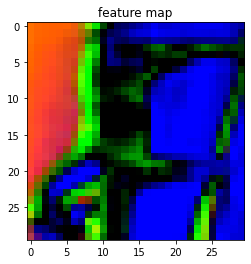

In [61]:
x = x.permute(2,1,0).detach().numpy()
plt.imshow(x)
plt.title('feature map')

Text(0.5, 1.0, 'feature map')

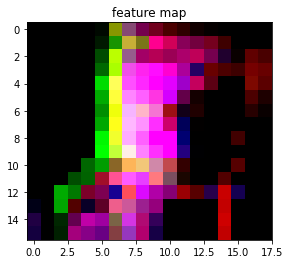

In [62]:
#differernt kind of convs

con1 = torch.nn.Conv2d(3,3,(3,2),2,(4,2),(2,4),padding_mode='reflect')
m = con1(p)
m = m.permute(2,1,0).detach().numpy()
plt.imshow(m)
plt.title('feature map')

In [63]:
con1.weight.shape

torch.Size([3, 3, 3, 2])

here kernel is not square its (3,2)

stride = 2

padding is 4 row reflected 2 col reflected

dilation by row in kernel is 2 and col wise 4

groups = 1 (default)

shape of weight will **( out_channels, out_channel / groups, kernel_size[0], kernel_size[1] )**

**groups** parameter in Conv2d


setting the groups to higher values makes the kernel as diagonal block-sparse matrix and the no of blocks will be groups value

![link text](https://www.researchgate.net/profile/Abir-Ben-Khaled-El-Feki/publication/263682261/figure/fig3/AS:667811173117967@1536229999838/Doubly-bordered-block-diagonal-matrix.png)

sparse matrix is matrix with most values are zero

working of covolutional layer

1. each input channel will have a differnt kernels
2. one kernel for input channel is not sufficient
  * each input channel will have many kernels





